# Question 6
Note that the given in the question does not go till 1, so similar pattern as been continued for transform as shown in end.

In [1]:
#Load necessary packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pandas
%matplotlib inline

Steps involved in transform: <br>
    1. Obtain the k1,k2,a,b values for the given patterns. This is done on close examination of the ranges for a,b. The k1,k2 are obtained by using y=mx+c(k1=m,k2=c) line where we have end points for each range<br>
    2. We call the function pieceWiseTransfrom with k1,k2,a,b as inpts. So now we loop throguh te pixels ad modif for outpt only for regions within a,b after normalisation. <br>
    3. I have made a function for plot the linear functions for easier visualisation. 

(438, 780)


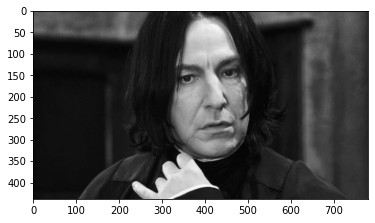

In [2]:
snape = cv2.imread("../images/snape1.jpg")
snape = cv2.cvtColor(snape,cv2.COLOR_BGR2GRAY)
plt.imshow(snape,cmap='gray')
print(snape.shape)

In [3]:
def drawHistogram(img):
    imgC = np.copy(img)
    imgC = imgC.ravel()
    his = np.zeros(256)
    for i in imgC:
        his[i] = his[i] + 1
    return his 

In [4]:
def piecewiseLinTransform(img,k1,k2,a,b):
    imgDim = img.shape
    imgNorm = img/255
    out = np.copy(imgNorm)
    diff = np.zeros_like(img)
    #ValueBelow
    for i in range(imgDim[0]):
        for j in range(imgDim[1]):
            if imgNorm[i][j]>=a and imgNorm[i][j]<=b:
                diff[i][j] = 1;
    Val = imgNorm[diff==1]
    upd = (k1*Val) + k2
    #Updating only values in that range
    out[diff==1] = upd
    out = np.array(out*255)
    return out.astype('uint8')

In [5]:
def piecewiseLinTransform(img,k1,k2,a,b):
    imgDim = img.shape
    imgNorm = img/255
    out = np.copy(imgNorm)
    diff = np.zeros_like(img)
    #ValueBelow
    for i in range(0,imgDim[0]):
        for j in range(imgDim[1]):
            if imgNorm[i][j]>=a and imgNorm[i][j]<=b:
                diff[i][j] = 1;
    Val = imgNorm[diff==1]
    upd = (k1*Val) + k2
    #Updating only values in that range
    out[diff==1] = upd
    out = np.array(out*255)
    return out.astype('uint8')

In [6]:
k1 = [1,-2,1,-2,1,-2,1]
k2 = [0,0.6,-0.3,1.2,-0.6,1.8,-0.9]
a =  [0,0.2,0.3,0.5,0.6,0.8,0.9]
b =  [0.2,0.3,0.5,0.6,0.8,0.9,1.0]
src = np.copy(snape)
out = np.copy(src)
for i in range(len(k1)):
    out = piecewiseLinTransform(out,k1[i],k2[i],a[i],b[i])

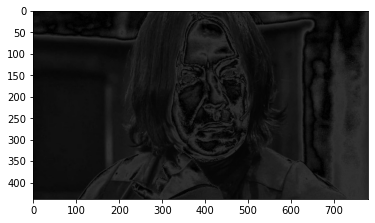

In [7]:
cv2.imwrite("newSnape.jpg",out)
newSnape = cv2.imread("newSnape.jpg")
plt.imshow(newSnape,cmap='gray')

(400, 533)


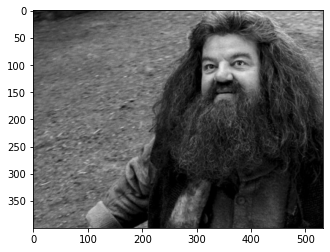

In [8]:
hag = cv2.imread("../images/hagrid.jpg")
hag = cv2.cvtColor(hag,cv2.COLOR_BGR2GRAY)
plt.imshow(hag,cmap='gray')
print(hag.shape)

In [9]:
k1 = [0,0,8,-8,0,0]
k2 = [0,0.2,-1.4,3.4,0.2,0]
a = [0,0.1,0.2,0.3,0.4,0.5]
b = [0.1,0.2,0.3,0.4,0.5,1]
out = np.copy(hag)
# out = np.copy(src)
for i in range(len(k1)):
    out = piecewiseLinTransform(out,k1[i],k2[i],a[i],b[i])

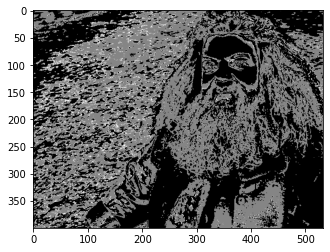

In [10]:

cv2.imwrite("newHag.jpg",out)
newHag = cv2.imread("newHag.jpg")
plt.imshow(out,cmap='gray')

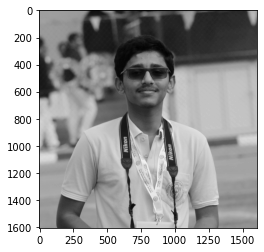

In [11]:
own = cv2.imread("../images/self.jpg")
own = cv2.cvtColor(own,cv2.COLOR_BGR2GRAY)
plt.imshow(own,cmap='gray')

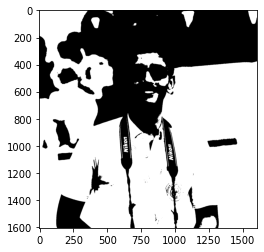

In [12]:
out = np.copy(own)
k1 = [0,0]
k2 = [0,1]
a =  [0,0.50]
b =  [0.50,1.0]
for i in range(len(k1)):
    out = piecewiseLinTransform(out,k1[i],k2[i],a[i],b[i])
plt.imshow(out,cmap='gray')

### Verification
We can show that the function works properly easily with this example  as all lighter images(I>122) are taken as white and rest black.

In [13]:
# cv2.imwrite("newOwn.jpg",out)
# newOwn = cv2.imread("newOwn.jpg")

In [14]:
def plotPieceWise(k1,k2,a,b):
    y = np.array([])
    x = np.zeros(10000)
#     print(x.size)
#     print(x)
    for i in range(10000):
        x[i] = i/10000
#     print(x)
    for i in x:
        for j in range(len(k1)):
            if (i>=a[j] and i<b[j]):
                y = np.append(y,k1[j]*i+k2[j])
                break
    plt.plot(x,y)

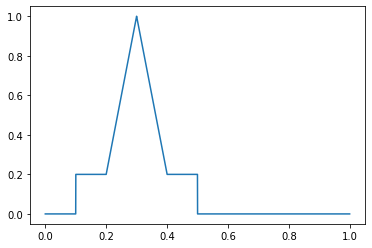

In [15]:
k1 = [0,0,8,-8,0,0]
k2 = [0,0.2,-1.4,3.4,0.2,0]
a = [0,0.1,0.2,0.3,0.4,0.5]
b = [0.1,0.2,0.3,0.4,0.5,1]
plotPieceWise(k1,k2,a,b)

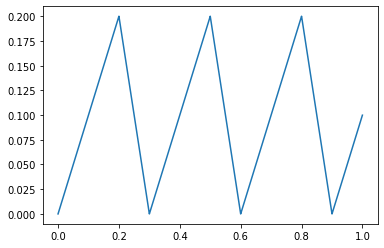

In [16]:
k1 = [1,-2,1,-2,1,-2,1]
k2 = [0,0.6,-0.3,1.2,-0.6,1.8,-0.9]
a =  [0,0.2,0.3,0.5,0.6,0.8,0.9]
b =  [0.2,0.3,0.5,0.6,0.8,0.9,1.0]
plotPieceWise(k1,k2,a,b)

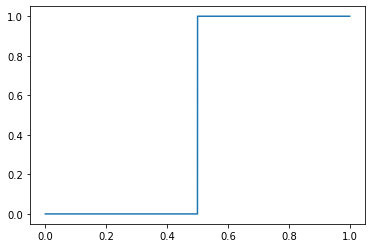

In [17]:
k1 = [0,0]
k2 = [0,1]
a =  [0,0.50]
b =  [0.50,1.0]
plotPieceWise(k1,k2,a,b)

In [18]:
# plt.plot(drawHistogram(hag))
# test = hag.astype('uint8').flatten()
# count = 0
# for i in range(len(test)):
#     if test[i] > 51 and test[i]<102:
#         count +=1
# print(count)

In [19]:
# nhag = cv2.imread("newHag.jpg")
# nhag = cv2.cvtColor(nhag,cv2.COLOR_BGR2GRAY)
# count = 0
# test = nhag.astype('uint8').flatten()
# for i in range(len(test)):
#     if test[i] > 51:
#         count +=1
# print(count)

In [20]:
# print(hag)